In [1]:
import json
import os
import math
from tqdm import tqdm

def load_game(filename: str) -> dict:
    """Load game data from a JSON file."""
    with open(filename, 'r') as file:
        data = json.load(file)
    return data


games = []
game_path = os.path.join(".", "crawler", "games", "classic")

for file in tqdm(os.listdir(game_path)):
    if file.endswith(".json"):
        game_data = load_game(os.path.join(game_path, file))
        games.append(game_data)

print(f"Loaded {len(games)} games.")

players = []
players_name_lvl = {}
for game in tqdm(games):
    for participant in game.get("info").get("participants", []):
        players_name_lvl[participant.get("riotIdGameName") + " #" + participant.get("riotIdTagline")] = participant.get("summonerLevel", 0)

for name, level in players_name_lvl.items():
    players.append((name, level))

print(f"Unique players: {len(players)}")



100%|██████████| 32669/32669 [02:22<00:00, 229.71it/s]


Loaded 32669 games.


100%|██████████| 32669/32669 [00:03<00:00, 10110.99it/s]


Unique players: 237687


In [2]:
from analysis.core import *

In [3]:
len(get_all_participants(games))

100%|██████████| 32669/32669 [00:02<00:00, 15627.30it/s]


237054 total number of players.


237054

In [4]:
print(get_all_gametypes(games))

100%|██████████| 32669/32669 [00:00<00:00, 295214.94it/s]

['MATCHED_GAME', 'CUSTOM_GAME']


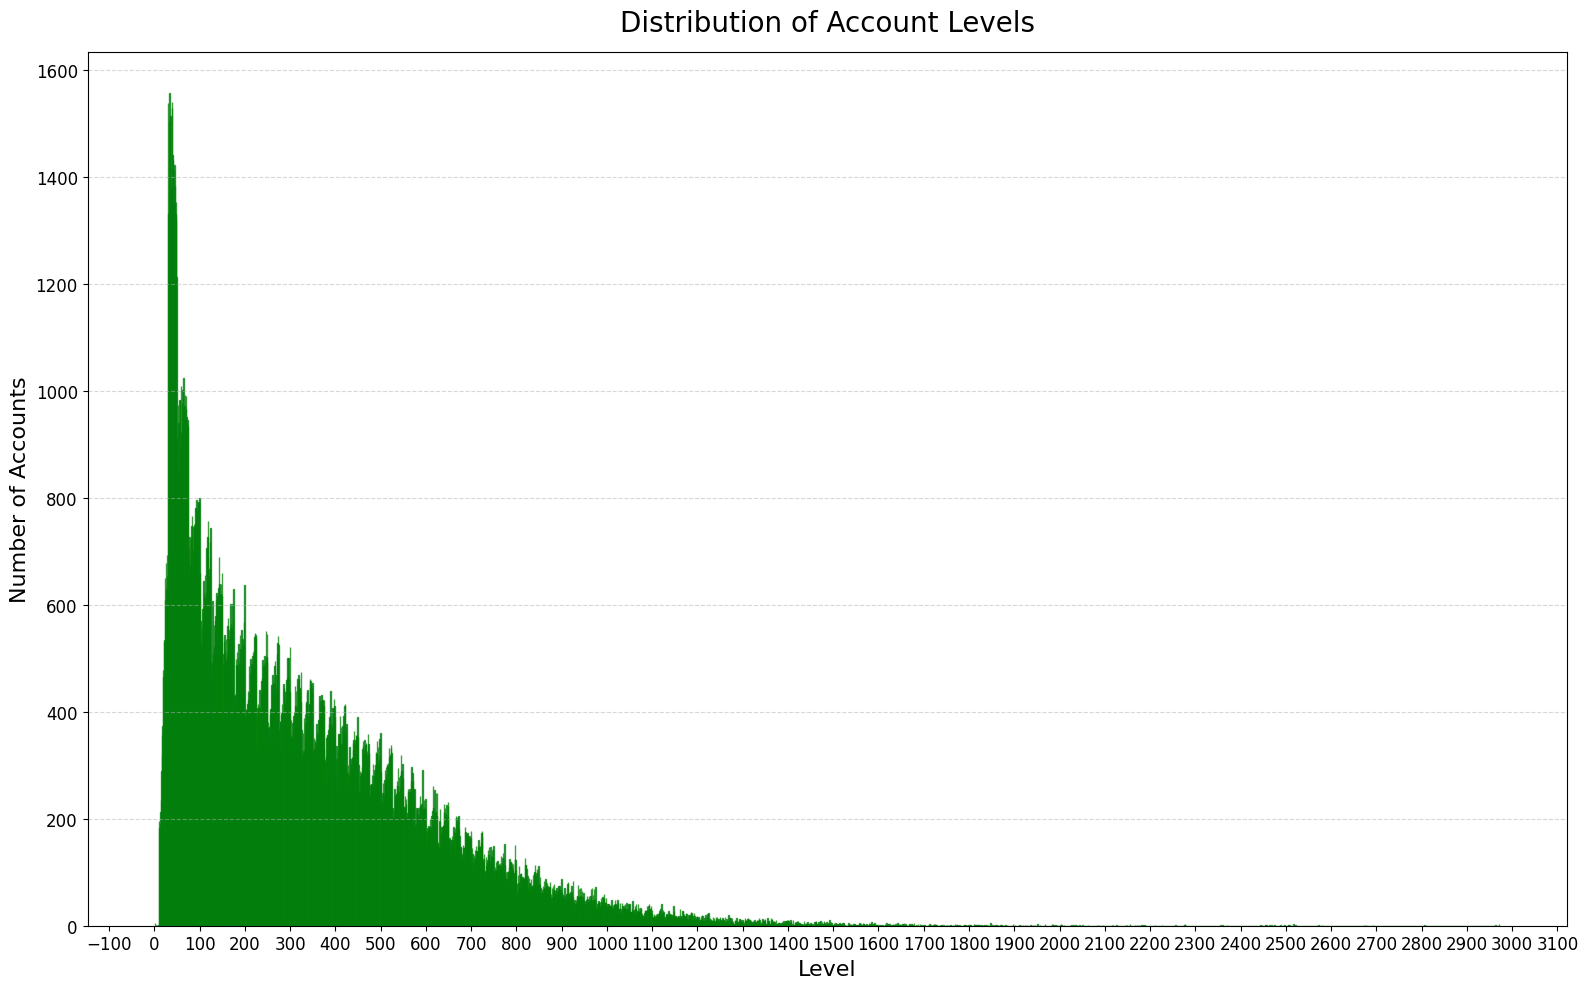

"Qnoxs #17165" Level: 2971


In [5]:
plot_level_distribution(games)
hname, hlevel = get_highest_level_player(games)
print(f"\"{hname}\" Level: {hlevel}")

100%|██████████| 61/61 [00:34<00:00,  1.77it/s]


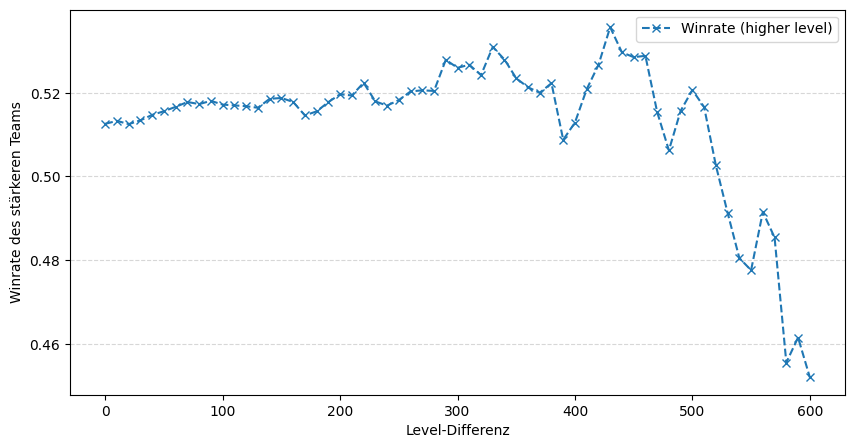

In [6]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 61)]
winrates = [higher_level_winrate(games, d) for d in tqdm(diffs)]

plt.figure(figsize=(10, 5))
plt.plot(diffs, winrates, marker="x", linestyle="--", label="Winrate (higher level)")

#plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
#plt.yticks([i/10 for i in range(0, 11)])

plt.xlabel("Level-Differenz")
plt.ylabel("Winrate des stärkeren Teams")
plt.legend()
plt.show()


100%|██████████| 101/101 [01:05<00:00,  1.54it/s]


[0.5083826278848806, 0.508518343567942, 0.5092227040321015, 0.5092093889221357, 0.5095081742937273, 0.5097078825892385, 0.5097925220740526, 0.5100153506308734, 0.5094134965522584, 0.5094906295050456, 0.5098639315108152, 0.510232040414419, 0.5095541401273885, 0.5102302375612212, 0.5109174442286742, 0.5114260494311494, 0.5117096018735363, 0.5122105930859499, 0.512513005859482, 0.513756252842201, 0.5142840278597568, 0.514653586756591, 0.5149968091895342, 0.5155077372650595, 0.5153670833621107, 0.5152474108170311, 0.5165140369313916, 0.5159499609069585, 0.5143205858421481, 0.5148648648648648, 0.5145622525296965, 0.5148404993065188, 0.515558562040974, 0.5162134944612286, 0.5172050931284857, 0.5206384149697303, 0.5206298126652109, 0.5214199759326114, 0.523175480467278, 0.5244543781225348, 0.5228175962724407, 0.5227793696275072, 0.5221490571685125, 0.5217118670638031, 0.523598820058997, 0.5216940363007778, 0.5233441910966341, 0.5228609372035666, 0.5218956208758249, 0.522397476340694, 0.519733

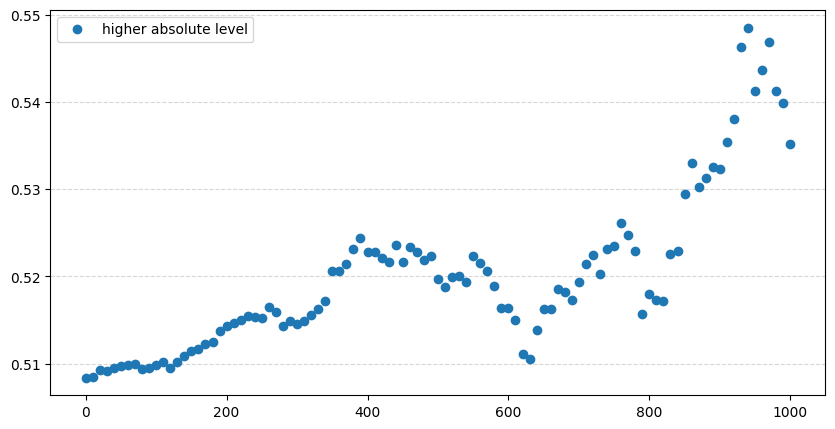

In [7]:
import matplotlib.pyplot as plt

diffs = [i * 10 for i in range(0, 101)]
winrates_higher = [higher_absolute_level_winrate(games, d) for d in tqdm(diffs)]

print(winrates_higher)
plt.figure(figsize=(10, 5))

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/100 for i in range(0, 101)])
plt.plot(diffs, winrates_higher, marker="o", linestyle="", label="higher absolute level")
plt.legend()
plt.show()

(21828.2, 18631.0)
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]
31356 Wins with higher champion level and 1280 Wins with lower champion level of 32636 games
30772 Wins with higher champion level and 1059 Wins with lower champion level of 31831 games
30472 Wins with higher champion level and 942 Wins with lower champion level of 31414 games
30215 Wins with higher champion level and 851 Wins with lower champion level of 31066 games
29961 Wins with higher champion level and 778 Wins with lower champion level of 30739 games
29691 Wins with higher champion level and 704 Wins with lower champion level of 30395 games
29389 Wins with higher champion level and 629 Wins with lower champion l

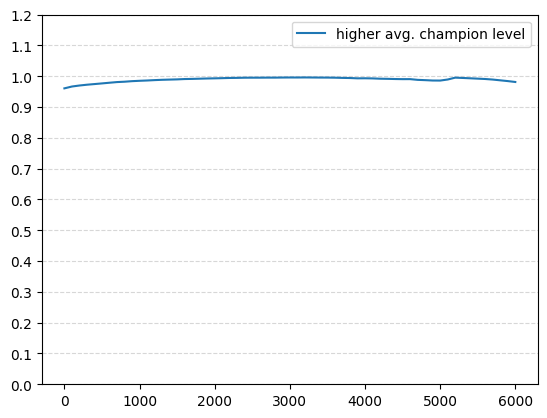

In [8]:
import matplotlib.pyplot as plt
print(get_team_champion_levels(games[1]))
diffs = [i * 100 for i in range(0, 61)]
winrates_higher = []
winrates_lower = []
print(diffs)
for d in diffs:
    wr = higher_champion_level_winrate(games, d)
    winrates_higher.append(wr)
print(winrates_higher)
plt.ylim(0, 1.2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.yticks([i/10 for i in range(0, 13)])
plt.plot(diffs, winrates_higher, label="higher avg. champion level")
#plt.plot(diffs, winrates_lower, label="lower avg. level")
plt.legend()
plt.show()

In [9]:
print(get_percentage_of_surrendered_games(games))

0.28834675074229393


  0%|          | 0/32669 [00:00<?, ?it/s]

100%|██████████| 32669/32669 [00:00<00:00, 61058.21it/s]


0.36145748987854254


100%|██████████| 32669/32669 [00:00<00:00, 129200.74it/s]


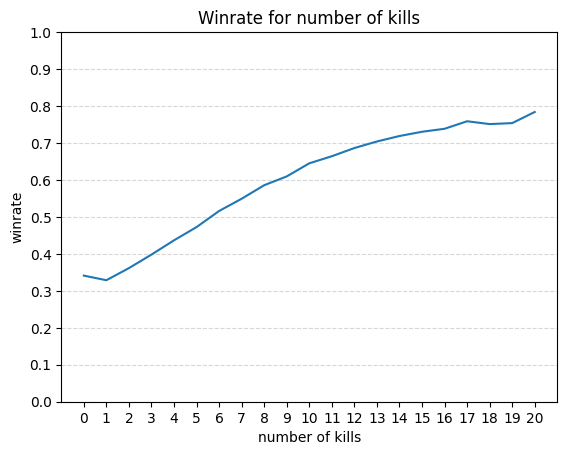

In [10]:
print(get_winratio_for_nr_kills(games, 2))
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills(games, k) for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()

100%|██████████| 32669/32669 [00:00<00:00, 125024.49it/s]


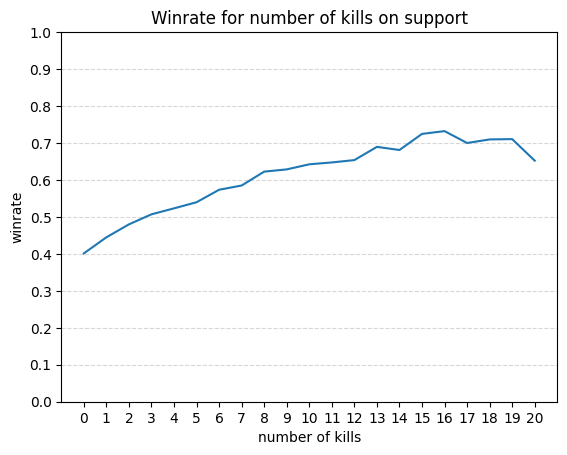

In [11]:
kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills_and_role(games, k, "SUPPORT", "BOTTOM") for k in kills]
plt.yticks([i/10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills on support")
plt.xlabel("number of kills")
plt.ylabel("winrate")
plt.plot(kills, winratio)
plt.show()

  2%|▏         | 719/32669 [00:00<00:04, 7188.91it/s]

100%|██████████| 32669/32669 [00:00<00:00, 113643.69it/s]


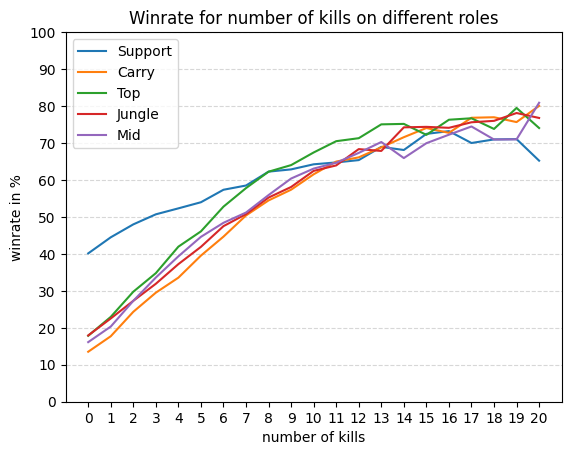

In [18]:
plt.yticks([i*10 for i in range(0, 13)])
plt.xticks(kills)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.title("Winrate for number of kills on different roles")
plt.xlabel("number of kills")
plt.ylabel("winrate in %")

kills = [i for i in range(0, 21)]
winratio = [get_winratio_for_nr_kills_and_role(games, k, "SUPPORT", "BOTTOM") * 100 for k in kills]
plt.plot(kills, winratio, label="Support")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "CARRY", "BOTTOM") * 100 for k in kills]
plt.plot(kills, winratio, label="Carry")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "SOLO", "TOP") * 100 for k in kills]
plt.plot(kills, winratio, label="Top")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "NONE", "JUNGLE") * 100 for k in kills]
plt.plot(kills, winratio, label="Jungle")

winratio = [get_winratio_for_nr_kills_and_role(games, k, "SOLO", "MIDDLE") * 100 for k in kills]
plt.plot(kills, winratio, label="Mid")
plt.legend()
plt.show()